### Environment setup

In [1]:
import matplotlib.pyplot as plt
from correlations import CorrelationsGenerator
import pickle
from dtaidistance import dtw
from dtaidistance import dtw_visualisation as dtwvis

### Load data and generate correlations

In [2]:
# load data
file = open('../../data/raw/timeseries_samples.pickle', 'rb')
data = pickle.load(file)

In [3]:
# get how correlated the devices are
data_df, device_correlations_df = CorrelationsGenerator().get_correlations(data)
device_correlations_df

Running preprocessing
Shape of preprocessed data (312412, 15)
Calculating distances
Descriptive stats of distances             dist
count  45.000000
mean    0.280320
std     0.131230
min     0.001725
25%     0.187701
50%     0.263168
75%     0.369981
max     0.626611
Calculating correlations


,device1,device2,dist,correlation
0,device_0,device_1,0.001725,correlated
4,device_0,device_5,0.176520,correlated
6,device_0,device_7,0.180804,correlated
12,device_1,device_5,0.176824,correlated
14,device_1,device_7,0.181462,correlated
28,device_3,device_8,0.187701,correlated
30,device_4,device_5,0.114074,correlated
31,device_4,device_6,0.078331,correlated
32,device_4,device_7,0.123262,correlated
35,device_5,device_6,0.107340,correlated


### Visualizations

#### Timeseries resampled at different frequencies

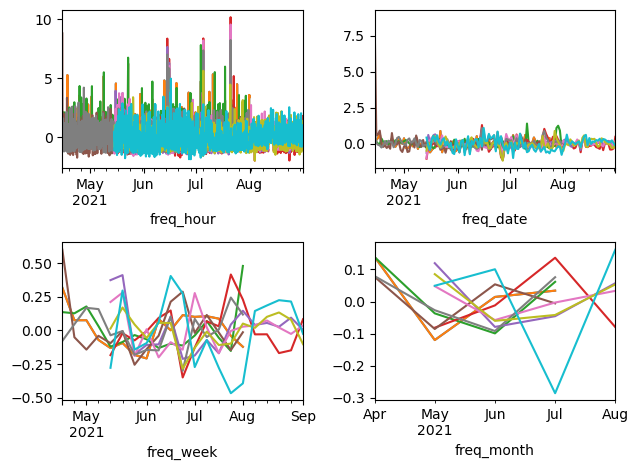

In [28]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
data_df.groupby('freq_hour').mean().plot(ax=ax1, legend=False)
data_df.groupby('freq_date').mean().plot(ax=ax2, legend=False)
data_df.groupby('freq_week').mean().plot(ax=ax3, legend=False)
data_df.groupby('freq_month').mean().plot(ax=ax4, legend=False)
fig.tight_layout()

In [7]:
example_device_pairs = device_correlations_df.groupby('correlation').head(1)[['device1', 'device2', ]].values

In [17]:
def make_dtw_path_visualization(device1, device2):
    x = data_df.groupby('freq_date').mean()[[device1, device2]].dropna()
    fig, ax = plt.subplots(2,1)
    path = dtw.warping_path(x[device1].values, x[device2].values)
    dtwvis.plot_warping(x[device1].values, x[device2].values, path, fig=fig, axs=ax)
    fig.suptitle(f"{device1} - {device2}")
    fig.tight_layout()

#### Example strongly correlated

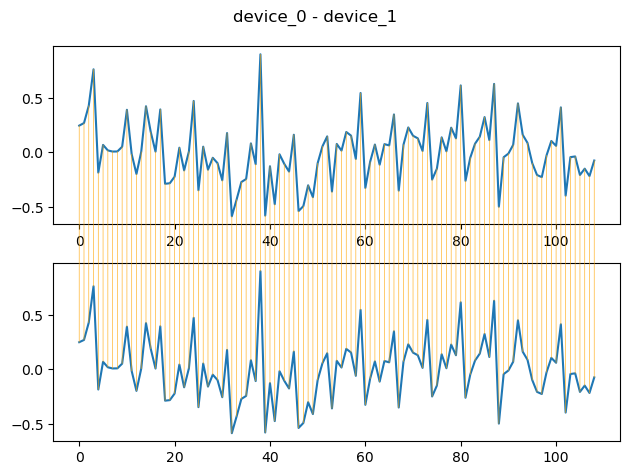

In [18]:

device1, device2 = example_device_pairs[0,:]
make_dtw_path_visualization(device1, device2)


#### Example of loosly correlated devices

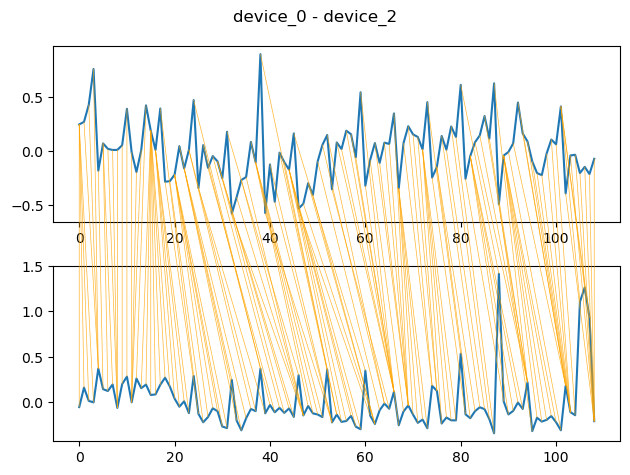

In [19]:
device1, device2 = example_device_pairs[1,:]
make_dtw_path_visualization(device1, device2)

#### Example of uncorrelated devices

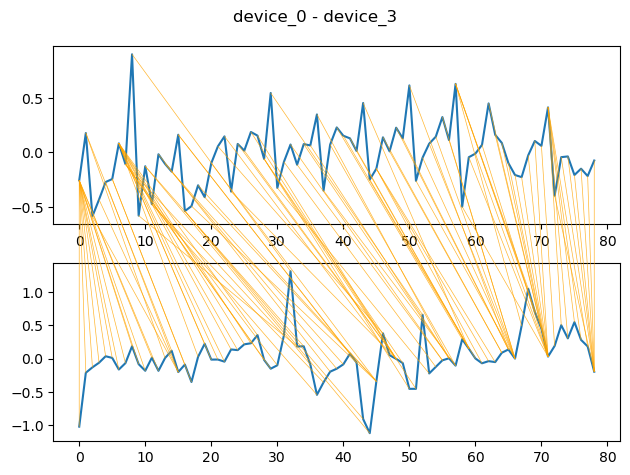

In [20]:
device1, device2 = example_device_pairs[2,:]
make_dtw_path_visualization(device1, device2)